In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

x0=np.zeros((2))
x0[0]=6
x0[1]=-6
E=0.001
L=1.

In [66]:
def f(x):
    return (x[0]**4+24*x[0]**3+2*x[0]**2*x[1]**2-32*x[0]**2*x[1]+344*x[0]**2+24*x[0]*x[1]**2-384*x[0]*x[1]+2396*x[0]+x[1]**4-32*x[1]**3+456*x[1]**2-3200*x[1]+9979)

def gradU(x):
    return np.array([4*x[0]**3+24*3*x[0]**2+4*x[0]*x[1]**2-64*x[0]*x[1]+688*x[0]+24*x[1]**2-384*x[1]+2396,4*x[0]**2*x[1]-32*x[0]**2+48*x[0]*x[1]-384*x[0]+4*x[1]**3-32*3*x[1]**2+456*2*x[1]-3200])

In [278]:

def grad_drob(x, E=1e-3):
    L=0.5
    x0=x
    p=-gradU(x0)
    xx=[x0]
    x1=x0+p/np.abs(p)
    i=1
    xx=np.append(xx,[x1],axis=0)
    while abs(f(x1)-f(x0))>E and np.linalg.norm(x1 - x0) >= E and np.linalg.norm(gradU(x1)) >= E:
        if (f(x0) - L*np.linalg.norm(p)) <= (f(x0) - 0.5*L*np.linalg.norm(p)):
                x0=x1
                x1=x0+L*p/np.abs(p)
                p=-gradU(x1)
        else:
             L = L * 0.5
        i+=1
        xx=np.append(xx,[x1],axis=0)
    print("Xmin",x1)    
    print(i)        
    return xx
            
    

In [280]:
grad_drob(x0)

Xmin [-5.  8.]
27


array([[ 6. , -6. ],
       [ 5. , -5. ],
       [ 4.5, -4.5],
       [ 4. , -4. ],
       [ 3.5, -3.5],
       [ 3. , -3. ],
       [ 2.5, -2.5],
       [ 2. , -2. ],
       [ 1.5, -1.5],
       [ 1. , -1. ],
       [ 0.5, -0.5],
       [ 0. ,  0. ],
       [-0.5,  0.5],
       [-1. ,  1. ],
       [-1.5,  1.5],
       [-2. ,  2. ],
       [-2.5,  2.5],
       [-3. ,  3. ],
       [-3.5,  3.5],
       [-4. ,  4. ],
       [-4.5,  4.5],
       [-5. ,  5. ],
       [-5.5,  5.5],
       [-6. ,  6. ],
       [-5.5,  6.5],
       [-6. ,  7. ],
       [-5.5,  7.5],
       [-5. ,  8. ]])

In [281]:
mg=grad_drob(x0)
tpx = mg[:, 1:]
tpx
tpy=mg[:,0:3:2]
tpy

Xmin [-5.  8.]
27


array([[ 6. ],
       [ 5. ],
       [ 4.5],
       [ 4. ],
       [ 3.5],
       [ 3. ],
       [ 2.5],
       [ 2. ],
       [ 1.5],
       [ 1. ],
       [ 0.5],
       [ 0. ],
       [-0.5],
       [-1. ],
       [-1.5],
       [-2. ],
       [-2.5],
       [-3. ],
       [-3.5],
       [-4. ],
       [-4.5],
       [-5. ],
       [-5.5],
       [-6. ],
       [-5.5],
       [-6. ],
       [-5.5],
       [-5. ]])

In [282]:
f([-5,8])

0

In [284]:
res = minimize(f, x0, method='powell',
                options={'xtol': 1e-8, 'disp': False})
res

   direc: array([[1., 0.],
       [0., 1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 3
  status: 0
 success: True
       x: array([-4.99999952,  8.        ])

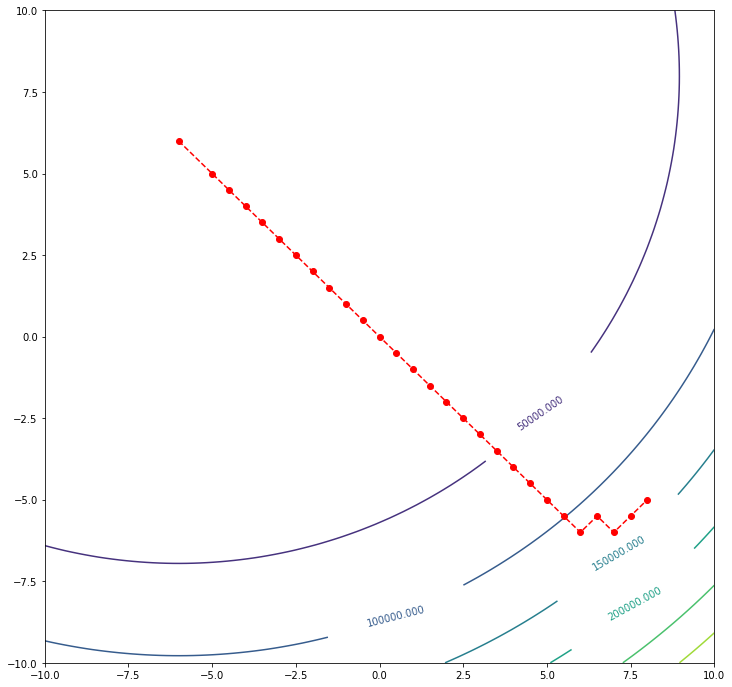

In [286]:
x1 = np.linspace(-10, 10, 100)
y1 = np.linspace(-10, 10, 100)



x, y = np.meshgrid(x1, y1)

fig, ax = plt.subplots()

l_r = [0, 1, 2, 3, 3.9, 6, 6.5, 7, 10, 20, 40, 100, 900,10000]

cs = ax.contour(x, y, f([ x, y]))
ax.clabel(cs)
ax.plot(tpx, tpy, 'ro--')
fig.set_figwidth(12)    #  ширина и
fig.set_figheight(12)    #  высота "Figure"

plt.show()